# Case Study 2

### imports

In [2]:
import netsim.netgen as ng
import netsim.netsim as ns
import netsim.utils as utils
import geopandas as gpd
import numpy as np

### Reading files

#### *Read DEM*

In [3]:
fn = r'..\data\case_study\DEM4.tif'

In [4]:
dem, meta = utils.read_raster(fn)

In [5]:
#find the cellsize of the dem
cellsize = meta['affine'].a

##### *Read shapefile into a geopandas dataframe*

In [6]:
# change 5 or 15
fn = r'..\data\case_study\IA_Sites.shp'

##### read and make a copy of original dataframe

In [7]:
df_temp = gpd.read_file(fn)

# make a copy
df = df_temp.copy(deep=True)
df

,Name,Seq,Group,Type,Northing,Easting,Chronology,Descriptio,geometry
0,Sa Taula des Moro,1,1,R,4386758.00,529457.00,Undet,Cyclopean Walls,POINT (529457 4386758)
1,Plat - Puig Son Sard,1,1,R,4388030.00,531670.00,Undet,Cyclopean Walls,POINT (531670 4388030)
2,Pula - Cases,1,3,H,4388760.00,532380.00,Iron Age,Cyclopean Walls,POINT (532380 4388760)
3,Cova d'en Bou,1,2,R,4386570.00,530820.00,Undet,Artificial Cave,POINT (530820 4386570)
4,Cova calenta,1,2,R,4385300.00,530410.00,Undet,Cave,POINT (530410 4385300)
5,Pula - Talaiots,1,3,H,4388428.18,532496.82,Iron Age,"Tower, Cyclopean Walls (UTM @ CIM: 4388630 532...",POINT (532496.8199999999 4388428.18)
6,Rumies,1,3,H,4387734.14,532661.23,Iron Age,Tower,POINT (532661.23 4387734.14)
7,Cova - Rafal Baix,1,2,R,4390786.00,531488.00,Iron Age,"(UTM @ CIM: 4390970, 531600). Natural Cave wit...",POINT (531488 4390786)
8,Son Lluc,1,3,H,4386469.00,532280.00,Iron Age,Tower. Presence of surface pottery. (UTM @ CIM...,POINT (532280 4386469)
9,Corralassos,1,3,H,4385846.00,533082.00,Iron Age,Talaiotic village. Pottery,POINT (533082 4385846)


### Preliminaries

#### *Convert point coordinates into rows and column and add to dataframe*

In [8]:
df['r'], df['c'] = utils.pt2rc(df['geometry'], meta)
df

,Name,Seq,Group,Type,Northing,Easting,Chronology,Descriptio,geometry,r,c
0,Sa Taula des Moro,1,1,R,4386758.00,529457.00,Undet,Cyclopean Walls,POINT (529457 4386758),854,38
1,Plat - Puig Son Sard,1,1,R,4388030.00,531670.00,Undet,Cyclopean Walls,POINT (531670 4388030),600,481
2,Pula - Cases,1,3,H,4388760.00,532380.00,Iron Age,Cyclopean Walls,POINT (532380 4388760),454,623
3,Cova d'en Bou,1,2,R,4386570.00,530820.00,Undet,Artificial Cave,POINT (530820 4386570),892,311
4,Cova calenta,1,2,R,4385300.00,530410.00,Undet,Cave,POINT (530410 4385300),1146,229
5,Pula - Talaiots,1,3,H,4388428.18,532496.82,Iron Age,"Tower, Cyclopean Walls (UTM @ CIM: 4388630 532...",POINT (532496.8199999999 4388428.18),520,646
6,Rumies,1,3,H,4387734.14,532661.23,Iron Age,Tower,POINT (532661.23 4387734.14),659,679
7,Cova - Rafal Baix,1,2,R,4390786.00,531488.00,Iron Age,"(UTM @ CIM: 4390970, 531600). Natural Cave wit...",POINT (531488 4390786),49,444
8,Son Lluc,1,3,H,4386469.00,532280.00,Iron Age,Tower. Presence of surface pottery. (UTM @ CIM...,POINT (532280 4386469),912,603
9,Corralassos,1,3,H,4385846.00,533082.00,Iron Age,Talaiotic village. Pottery,POINT (533082 4385846),1037,763


#### *Plot locations*

In [9]:
hillshade = utils.calculate_hillshade(dem)

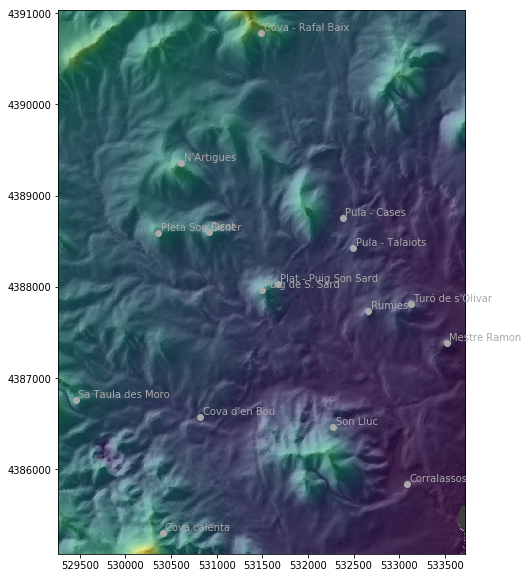

In [10]:
utils.plot_map({'ras':dem, 'meta':meta, 'bground':hillshade}, loc={'df':df, 'label':'Name'},
               cmap='viridis', figsize=(10,10), save='preliminary')

### create network generator

In [11]:
# check values
df = ng.setup(df)


 No corrections or errors !! 


In [12]:
# create network generator
netgentor, net_info, total_iterations = ng.create_network_generator(df)


 iteration broken per group....

   group    iter_type  num_iter  num_loc
0      1  permutation        24        4
1      2  permutation        24        4
2      3       sample       100        8

 total number of iterations.... 57600


In [14]:
net_iteration = list(next(netgentor))
net_iteration

[(0, 1, 11, 14), (3, 4, 7, 13), (9, 15, 2, 10, 12, 8, 5, 6)]

### Simulation setup

###### *find coefficients for gradient to cost function*

In [1]:
# vertical factor table
vftfn = r'..\data\iwdt\grad2cost.csv'

# read file slope (tan) to cost
vft = np.genfromtxt(vftfn, delimiter=',')

NameError: name 'np' is not defined

In [2]:
# fit values to 4th degree polynomial and return coefficients
coef = np.polyfit(np.tan(np.radians(vft[: , 0])), vft[:,1], deg=4)
coef

NameError: name 'np' is not defined

##### Set up cost dictionary

In [3]:
cost_dict={
    'dem': dem,
    'netcost': np.zeros_like(dem),
    'cellsize': cellsize,
    'weight': 0.5,
    'coef': coef
}

NameError: name 'dem' is not defined

##### Set up netsim dictionary

###### *calculate $\alpha$ for given $d_0$ and $NC_0$*

We shall specify that at a distance of $d_0$=20m the network cost (i.e. the effect of the existing network) will decrease to $\frac{1}{2} $.  

In [52]:
from math import log

d0 = 20 # distance @ which network cost is NC0
NC0 = 0.5
alpha = d0 / log(1- NC0)

In [53]:
netsim_dict= {
    'i': 1.0,    # path impact
    'Gmax': 5.0, # path saturation
    'T': 10,     # residuality 
    'alpha': alpha # decay factor 
    }

#### Run a single simulation

n_simulations = 1

In [47]:
for iter_id in range(n_simulations):
    
    # progress
    
    # generate network iteration
    net_iteration = list(next(netgentor))
    
    # create path network layout for current iteration
    df_net = ng.network_layout(df, net_iteration, iter_id, opt='decentral')
    
    # simulate network
    _, paths, netpaths = ns.simulation(df, df_net, cost_dict, netsim_dict)


In [54]:
g, paths, netpaths = ns.simulation(df, df_net, cost_dict, netsim_dict)

##### Plot results

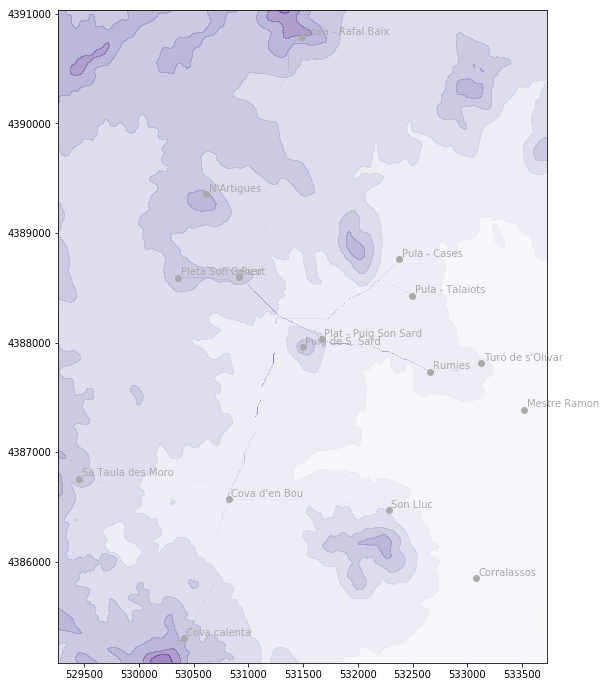

In [56]:
utils.plot_map({'ras':dem, 'meta':meta, 'paths':paths}, loc={'df':df, 'label':'name'}, cmap='magma',
               figsize=(20,12), save='eraseme')